In [2]:
import pymysql, time
import pandas as pd

from gensim import corpora
import gensim.downloader as api
from gensim.utils import simple_preprocess
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument, Doc2Vec


loc_conf = {
        'mysql_user': 'client',
        'mysql_db': 'nlp',
        'mysql_host': '127.0.0.1',
        'mysql_password': 'client',
    }
    


try:
    cnn = pymysql.connect(host=loc_conf['mysql_host'],
                         user=loc_conf['mysql_user'],
                         password=loc_conf['mysql_password'],
                         db=loc_conf['mysql_db'],
                         charset='utf8mb4',
                         cursorclass=pymysql.cursors.DictCursor,
                         autocommit=True)
except:
    print ( '{"result" : "connection error"}')
    exit()


sql = "SELECT negative,positive FROM review"
sql = "SELECT review,model,rate FROM review"

# sql = "SELECT 1"
try:
    with cnn.cursor() as cursor:
        cursor.execute(sql)
        rows =cursor.fetchall()

except Exception as err:
    print(err)
    print('------ SQL 1 error ---- ' )
    exit()

# print(rows)
data2 = pd.DataFrame(rows)


In [3]:
data2.head(10)


,review,model,rate
0,На девятый день рождения дочка попросила новый...,Honor 8,4
1,Привет всем друзьям и посетителям Отзовика!Сма...,Honor 8,5
2,За 10 000 рублей данный смартфон это оптимальн...,Honor 8,5
3,"Привет, дорогой читатель(а может и пользовател...",Honor 8,5
4,"Искал себе телефон небольших размеров, чтоб уд...",Honor 8,3
5,"Купила месяц назад смартфон Honor 8а, в целом ...",Honor 8,5
6,"Года 2 пользовался Сяоми. Был Редми ноут 4, по...",Honor 8,4
7,Купил это чудо на замену старенькому Meizu. Чт...,Honor 8,5
8,"Пользуюсь данным телефоном уже второй год, за ...",Honor 8,4
9,"На самом деле вполне неплохой телефон, за те д...",Honor 8,4


In [4]:
data2.to_csv('review.csv')

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/akalend/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stopwords


In [6]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

stopwords_ru = stopwords.words("russian")

stopwords_ru

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [7]:
# stopwords_ru.append('в')

In [8]:
positive = data2['positive']

In [9]:
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"

morph = MorphAnalyzer()
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
#     print('****', tokens)
    return None


In [10]:
df = positive.drop_duplicates()
df 
#data = [ token.replace(',',' ').replace('.',' ').split(' ')  for token in df['positive']  ]
data = [ token.lower().split(' ')  for token in data2['positive']  ]
  

In [11]:
doc = []
id = 0
for line in data:
    res =lemmatize(" ".join(line))
    if res:
        doc.append(res)
        if res[0] == 'вр':
            print(line)
            print(res)
             
    
print(doc)
    
# doc = [  lemmatize(" ".join(line))  for line in data  ]    


['-', 'врeмя', 'paботы', 'батapeи', '-', 'чувcтвитeльнocть', 'cенcоpa', '-', 'яркocть', 'экpaнa', '-', 'пpoизвoдитeльнocёть']
['вр', 'мя', 'бот', 'бат', 'чув', 'твит', 'льн', 'ть', 'ен', 'ярк', 'ть', 'эк', 'н', 'п', 'изв', 'дит', 'льн', 'ёть']
[['цена', 'цвет', 'отлично', 'работать', 'камера', 'объём', 'память', 'экран', 'андроид'], ['тройной', 'слот', 'гб', 'неизбитый', 'цвет', 'корпус', 'шустрый', 'очень', 'удобный', 'интерфейс', 'управление', 'настройка', 'пользователь', 'хороший', 'цена'], ['экран', 'цена', 'внешний', 'вид', 'производительность'], ['цена', 'вполне', 'нормальный', 'камера', 'разблокировка', 'отпечаток', 'палец'], ['цена', 'большой', 'объём', 'память'], ['самый', 'главный', 'плюс', 'это', 'цена'], ['яркий', 'экран', 'достаточно', 'шустрый', 'цена', 'сканер', 'отпечаток', 'отличный'], ['цена', 'мощный', 'аккумулятор', 'качественный', 'дисплей', 'хороший', 'уровень', 'приём', 'сигнал', 'андроид', 'мощный', 'процессор'], ['качество', 'цена', 'производительность'], ['пам

In [12]:
data[0][0]
#df.to_csv('review.csv')

'цена,'

In [13]:
type(data)

list

In [14]:
from collections import defaultdict
# data = negative
word_freq = defaultdict(int)
for tokens in doc:
    for token in tokens:
        word_freq[token] += 1

In [15]:
# словарь
len(word_freq)
word_freq

defaultdict(int,
            {'цена': 289,
             'цвет': 89,
             'отлично': 37,
             'работать': 47,
             'камера': 1196,
             'объём': 46,
             'память': 228,
             'экран': 454,
             'андроид': 25,
             'тройной': 5,
             'слот': 10,
             'гб': 28,
             'неизбитый': 1,
             'корпус': 114,
             'шустрый': 55,
             'очень': 175,
             'удобный': 224,
             'интерфейс': 73,
             'управление': 14,
             'настройка': 6,
             'пользователь': 2,
             'хороший': 501,
             'внешний': 106,
             'вид': 113,
             'производительность': 175,
             'вполне': 9,
             'нормальный': 12,
             'разблокировка': 14,
             'отпечаток': 44,
             'палец': 42,
             'большой': 167,
             'самый': 14,
             'главный': 5,
             'плюс': 86,
             'это': 45

In [16]:
# data = data.apply(lemmatize)

In [17]:

data


[['цена,',
  'цвет,',
  'отлично',
  'работает,',
  'камера,',
  'объем',
  'памяти,',
  'экран,',
  'андроид.'],
 ['тройной',
  'слот,',
  '3+',
  '64',
  'гб,',
  'неизбитый',
  'цвет',
  'корпуса,',
  'шустрый,',
  'очень',
  'удобный',
  'интерфейс',
  'и',
  'управление,',
  'настройки',
  'под',
  'пользователя,',
  'хорошая',
  'цена'],
 ['экран,', 'цена,', 'внешний', 'вид,', 'производительность'],
 ['цена,',
  'вполне',
  'нормальная',
  'камера,',
  'разблокировка',
  'по',
  'отпечатку',
  'пальца'],
 ['цена,', 'большой', 'объем', 'памяти'],
 ['самый', 'главный', 'плюс', 'это', 'цена'],
 ['яркий',
  'экран.',
  'nfc.',
  'достаточно',
  'шустрый.',
  'цена.сканер',
  'отпечатка',
  'отличный.'],
 ['цена,',
  'мощный',
  'аккумулятор,',
  'качественный',
  'дисплей,',
  'хороший',
  'уровень',
  'приема',
  'сигнала,',
  'андроид,',
  'мощный',
  'процессор'],
 ['качество', 'цена', 'производительность'],
 ['память,', 'аккумулятор,', 'распознавание', 'по', 'лицу'],
 ['функция',

In [18]:
sorted(word_freq, key=word_freq.get, reverse=True)[:25]

['камера',
 'хороший',
 'экран',
 'дизайн',
 'батарея',
 'цена',
 'отличный',
 'качество',
 'память',
 'удобный',
 'процессор',
 'быстрый',
 'держать',
 'очень',
 'производительность',
 'звук',
 'большой',
 'зарядка',
 'красивый',
 'мощный',
 'аккумулятор',
 'заряд',
 'телефон',
 'работа',
 'дисплей']

In [19]:
dictionary = corpora.Dictionary(data)
dictionary.token2id

{'андроид.': 0,
 'камера,': 1,
 'объем': 2,
 'отлично': 3,
 'памяти,': 4,
 'работает,': 5,
 'цвет,': 6,
 'цена,': 7,
 'экран,': 8,
 '3+': 9,
 '64': 10,
 'гб,': 11,
 'и': 12,
 'интерфейс': 13,
 'корпуса,': 14,
 'настройки': 15,
 'неизбитый': 16,
 'очень': 17,
 'под': 18,
 'пользователя,': 19,
 'слот,': 20,
 'тройной': 21,
 'удобный': 22,
 'управление,': 23,
 'хорошая': 24,
 'цвет': 25,
 'цена': 26,
 'шустрый,': 27,
 'вид,': 28,
 'внешний': 29,
 'производительность': 30,
 'вполне': 31,
 'нормальная': 32,
 'отпечатку': 33,
 'пальца': 34,
 'по': 35,
 'разблокировка': 36,
 'большой': 37,
 'памяти': 38,
 'главный': 39,
 'плюс': 40,
 'самый': 41,
 'это': 42,
 'nfc.': 43,
 'достаточно': 44,
 'отличный.': 45,
 'отпечатка': 46,
 'цена.сканер': 47,
 'шустрый.': 48,
 'экран.': 49,
 'яркий': 50,
 'аккумулятор,': 51,
 'андроид,': 52,
 'дисплей,': 53,
 'качественный': 54,
 'мощный': 55,
 'приема': 56,
 'процессор': 57,
 'сигнала,': 58,
 'уровень': 59,
 'хороший': 60,
 'качество': 61,
 'лицу': 62,
 'п

In [20]:
# Create the Corpus
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in data]


In [21]:
import pprint
pprint.pprint(mycorpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(7, 1), (8, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (7, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(2, 1), (7, 1), (37, 1), (38, 1)],
 [(26, 1), (39, 1), (40, 1), (41, 1), (42, 1)],
 [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)],
 [(7, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(26, 1), (30, 1), (61, 1)],
 [(35, 1), (51, 1), (62, 1), (63, 1), (64, 1)],
 [(12, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(7, 1), (67, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)],
 [(1, 1), (8, 1), (12, 1), (26, 1), (78, 1), (79, 1), (80, 1)],
 [(50, 1)

  (1350, 1),
  (1351, 1),
  (1352, 1)],
 [(1, 1),
  (8, 1),
  (12, 1),
  (109, 1),
  (236, 1),
  (251, 1),
  (254, 1),
  (1353, 1),
  (1354, 1)],
 [(353, 1), (740, 1), (1355, 1), (1356, 1), (1357, 1), (1358, 1), (1359, 1)],
 [(12, 2),
  (28, 1),
  (29, 1),
  (98, 1),
  (147, 1),
  (164, 1),
  (255, 1),
  (316, 1),
  (324, 1),
  (594, 1),
  (808, 1),
  (812, 1),
  (832, 1),
  (955, 1),
  (1018, 1),
  (1019, 1),
  (1360, 1),
  (1361, 1),
  (1362, 1),
  (1363, 1),
  (1364, 1)],
 [(132, 1), (1222, 1), (1365, 1), (1366, 1), (1367, 1), (1368, 1), (1369, 1)],
 [(55, 1),
  (72, 1),
  (473, 1),
  (475, 1),
  (504, 1),
  (935, 1),
  (1144, 1),
  (1370, 1),
  (1371, 1),
  (1372, 1)],
 [(53, 1),
  (60, 1),
  (67, 1),
  (222, 1),
  (363, 1),
  (729, 1),
  (927, 1),
  (931, 1),
  (932, 1),
  (934, 1),
  (935, 1),
  (936, 1),
  (937, 1),
  (938, 1),
  (1188, 1)],
 [(22, 1),
  (67, 1),
  (98, 1),
  (121, 1),
  (222, 1),
  (248, 1),
  (266, 1),
  (437, 1),
  (737, 1),
  (932, 1),
  (1373, 1),
  (1374, 

 [(98, 1)],
 [(50, 1),
  (53, 1),
  (55, 1),
  (85, 1),
  (198, 1),
  (342, 1),
  (424, 1),
  (425, 1),
  (787, 1),
  (807, 1),
  (808, 1),
  (1686, 1),
  (1747, 1),
  (2437, 1),
  (2438, 1),
  (2439, 1),
  (2440, 1)],
 [(1, 1), (14, 1), (57, 1), (2441, 1)],
 [(555, 1), (2064, 1)],
 [(1, 1), (8, 1), (37, 1), (55, 1), (444, 1), (1139, 1)],
 [(67, 1), (2442, 1)],
 [(35, 1),
  (36, 1),
  (61, 1),
  (98, 1),
  (140, 1),
  (418, 1),
  (669, 1),
  (974, 1),
  (2443, 1)],
 [(1, 1), (12, 1), (73, 1), (424, 1), (723, 1), (2001, 1)],
 [(4, 1), (104, 1), (366, 1), (2444, 1)],
 [(12, 1),
  (79, 1),
  (141, 1),
  (316, 1),
  (406, 1),
  (562, 1),
  (1236, 1),
  (1436, 1),
  (1459, 1),
  (1842, 1),
  (1844, 1),
  (1911, 1),
  (2341, 1),
  (2445, 1),
  (2446, 1),
  (2447, 1),
  (2448, 1),
  (2449, 1),
  (2450, 1),
  (2451, 1),
  (2452, 1),
  (2453, 1),
  (2454, 1)],
 [(83, 1), (99, 1), (165, 1), (424, 1), (605, 1)],
 [(12, 1),
  (24, 1),
  (30, 1),
  (61, 1),
  (241, 1),
  (2288, 1),
  (2455, 1),
  (

  (3335, 1),
  (3336, 1),
  (3337, 1)],
 [(8, 1), (37, 1), (60, 1), (135, 1), (1277, 1), (2905, 1)],
 [(7, 1),
  (63, 1),
  (67, 1),
  (88, 1),
  (122, 1),
  (316, 1),
  (881, 1),
  (882, 1),
  (2217, 1),
  (2728, 1)],
 [(7, 1), (459, 1)],
 [(7, 1), (8, 1), (28, 1), (29, 1), (30, 1), (37, 1)],
 [(2, 1),
  (12, 1),
  (24, 1),
  (37, 2),
  (49, 1),
  (50, 1),
  (67, 1),
  (129, 1),
  (142, 1),
  (443, 1),
  (466, 1),
  (569, 1),
  (720, 1),
  (1210, 1),
  (1212, 1),
  (1218, 1),
  (3338, 1),
  (3339, 1),
  (3340, 1)],
 [(67, 1),
  (79, 1),
  (98, 1),
  (316, 1),
  (376, 1),
  (404, 1),
  (417, 1),
  (1525, 1),
  (1940, 1),
  (3305, 1),
  (3341, 1)],
 [(3, 1), (17, 1), (130, 1), (153, 1), (1799, 1), (3342, 1), (3343, 1)],
 [(104, 1),
  (113, 1),
  (197, 1),
  (692, 1),
  (821, 1),
  (910, 1),
  (2217, 1),
  (2762, 1),
  (3328, 1),
  (3344, 1),
  (3345, 1),
  (3346, 1),
  (3347, 1),
  (3348, 1),
  (3349, 1),
  (3350, 1)],
 [(60, 1),
  (149, 1),
  (165, 1),
  (541, 1),
  (605, 1),
  (1020, 

In [22]:
# w2v_model.build_vocab(negative)

In [23]:
# w2v_model.train(negative, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

Расчет матрицы **TF-IDF**

In [24]:
from gensim.utils import simple_preprocess
# ll = []
negative_bow =  [simple_preprocess(line['negative']) for line in rows]
negative_bow

[['слабая', 'батарея', 'медленная', 'зарядка'],
 ['пока', 'не', 'нашла'],
 ['отсутствуют'],
 ['нет'],
 ['тормозит', 'камера', 'не', 'соответствет'],
 ['маленькая', 'ботарея'],
 ['не',
  'удаляемые',
  'приложения',
  'батарея',
  'слабоват',
  'неудобная',
  'клавиатура',
  'стекло',
  'не',
  'горилла',
  'гласс',
  'штатная',
  'зарядка',
  'слабая'],
 ['шумит', 'камера', 'темное', 'время', 'суток'],
 ['не', 'заметил'],
 ['экран', 'сильно', 'царапается'],
 ['минусов', 'нет'],
 ['не', 'обнаружено'],
 ['их', 'нет'],
 ['имхо', 'не', 'положили', 'чехолчик', 'комплект'],
 ['минусов', 'нет'],
 ['нет'],
 ['слабая', 'батарея'],
 ['нет'],
 ['нет'],
 ['никаких'],
 ['аккумулятор',
  'совмещенный',
  'слот',
  'для',
  'карты',
  'памяти',
  'сим',
  'карты'],
 ['минусов', 'не', 'обнаружено'],
 ['небольшое',
  'время',
  'работы',
  'батареи',
  'фронтальная',
  'камера',
  'нарушает',
  'баланс',
  'белого',
  'теряет',
  'чёткость',
  'изображения',
  'основные',
  'камеры',
  'не',
  'всегда'

In [25]:
positive_bow =  [simple_preprocess(line['positive']) for line in rows]
positive_bow

[['цена',
  'цвет',
  'отлично',
  'работает',
  'камера',
  'объем',
  'памяти',
  'экран',
  'андроид'],
 ['тройной',
  'слот',
  'гб',
  'неизбитый',
  'цвет',
  'корпуса',
  'шустрый',
  'очень',
  'удобный',
  'интерфейс',
  'управление',
  'настройки',
  'под',
  'пользователя',
  'хорошая',
  'цена'],
 ['экран', 'цена', 'внешний', 'вид'],
 ['цена',
  'вполне',
  'нормальная',
  'камера',
  'разблокировка',
  'по',
  'отпечатку',
  'пальца'],
 ['цена', 'большой', 'объем', 'памяти'],
 ['самый', 'главный', 'плюс', 'это', 'цена'],
 ['яркий',
  'экран',
  'nfc',
  'достаточно',
  'шустрый',
  'цена',
  'сканер',
  'отпечатка',
  'отличный'],
 ['цена',
  'мощный',
  'аккумулятор',
  'качественный',
  'дисплей',
  'хороший',
  'уровень',
  'приема',
  'сигнала',
  'андроид',
  'мощный',
  'процессор'],
 ['качество', 'цена'],
 ['память', 'аккумулятор', 'распознавание', 'по', 'лицу'],
 ['функция', 'nfc', 'память', 'гб', 'простой', 'понятный', 'использовании'],
 ['доступная', 'цена', 'лег

In [26]:
mydict = corpora.Dictionary(positive_bow)
#pprint.pprint(mydict)

# dictionary.token2id



In [27]:
corpus = [mydict.doc2bow(doc, allow_update=True) for doc in positive_bow]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(6, 1),
  (7, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(7, 1), (8, 1), (23, 1), (24, 1)],
 [(1, 1), (7, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(2, 1), (4, 1), (7, 1), (31, 1)],
 [(7, 1), (32, 1), (33, 1), (34, 1), (35, 1)],
 [(7, 1),
  (8, 1),
  (22, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(0, 1),
  (7, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1)],
 [(7, 1), (51, 1)],
 [(29, 1), (42, 1), (52, 1), (53, 1), (54, 1)],
 [(9, 1), (36, 1), (53, 1), (55, 1), (56, 1), (57, 1), (58, 1)],
 [(7, 1), (55, 1), (59, 1), (60, 1), (61, 1), (62, 1)],
 [(1, 1), (7, 1), (8, 1), (63, 1), (64, 1), (65, 1)],
 [(8, 1), (41, 1), (66, 1), (67, 1)],
 [(51, 1), (68, 1)],
 [(51, 1), (59, 1)],
 [(4, 1),
  (9, 1

In [28]:
# Show the Word Weights in Corpus
for doc in corpus:
    print([[mydict[id], freq] for id, freq in doc])



[['андроид', 1], ['камера', 1], ['объем', 1], ['отлично', 1], ['памяти', 1], ['работает', 1], ['цвет', 1], ['цена', 1], ['экран', 1]]
[['цвет', 1], ['цена', 1], ['гб', 1], ['интерфейс', 1], ['корпуса', 1], ['настройки', 1], ['неизбитый', 1], ['очень', 1], ['под', 1], ['пользователя', 1], ['слот', 1], ['тройной', 1], ['удобный', 1], ['управление', 1], ['хорошая', 1], ['шустрый', 1]]
[['цена', 1], ['экран', 1], ['вид', 1], ['внешний', 1]]
[['камера', 1], ['цена', 1], ['вполне', 1], ['нормальная', 1], ['отпечатку', 1], ['пальца', 1], ['по', 1], ['разблокировка', 1]]
[['объем', 1], ['памяти', 1], ['цена', 1], ['большой', 1]]
[['цена', 1], ['главный', 1], ['плюс', 1], ['самый', 1], ['это', 1]]
[['цена', 1], ['экран', 1], ['шустрый', 1], ['nfc', 1], ['достаточно', 1], ['отличный', 1], ['отпечатка', 1], ['сканер', 1], ['яркий', 1]]
[['андроид', 1], ['цена', 1], ['аккумулятор', 1], ['дисплей', 1], ['качественный', 1], ['мощный', 2], ['приема', 1], ['процессор', 1], ['сигнала', 1], ['уровень', 

In [29]:
# Create the TF-IDF model
from gensim import models
import numpy as np
tfidf = models.TfidfModel(corpus, smartirs='ntc')
# Show the TF-IDF weights
for doc in tfidf[corpus]:
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])

[['андроид', 0.44], ['камера', 0.08], ['объем', 0.42], ['отлично', 0.4], ['памяти', 0.3], ['работает', 0.39], ['цвет', 0.39], ['цена', 0.2], ['экран', 0.17]]
[['цвет', 0.2], ['цена', 0.1], ['гб', 0.22], ['интерфейс', 0.17], ['корпуса', 0.23], ['настройки', 0.31], ['неизбитый', 0.38], ['очень', 0.13], ['под', 0.25], ['пользователя', 0.38], ['слот', 0.27], ['тройной', 0.38], ['удобный', 0.13], ['управление', 0.28], ['хорошая', 0.11], ['шустрый', 0.18]]
[['цена', 0.4], ['экран', 0.34], ['вид', 0.59], ['внешний', 0.61]]
[['камера', 0.06], ['цена', 0.15], ['вполне', 0.4], ['нормальная', 0.42], ['отпечатку', 0.52], ['пальца', 0.33], ['по', 0.3], ['разблокировка', 0.41]]
[['объем', 0.69], ['памяти', 0.49], ['цена', 0.32], ['большой', 0.43]]
[['цена', 0.19], ['главный', 0.61], ['плюс', 0.4], ['самый', 0.54], ['это', 0.37]]
[['цена', 0.18], ['экран', 0.16], ['шустрый', 0.32], ['nfc', 0.37], ['достаточно', 0.43], ['отличный', 0.31], ['отпечатка', 0.42], ['сканер', 0.38], ['яркий', 0.31]]
[['андр

[['камера', 0.05], ['из', 0.51], ['на', 0.18], ['действия', 0.4], ['оценка', 0.44], ['прикосновения', 0.44], ['реакция', 0.4]]
[['цена', 0.15], ['хорошая', 0.17], ['nfc', 0.32], ['процессор', 0.18], ['память', 0.22], ['дизайн', 0.13], ['быстрая', 0.24], ['зарядка', 0.22], ['type', 0.43], ['наличие', 0.38], ['норм', 0.57]]
[['батареи', 0.69], ['заряд', 0.5], ['быстрый', 0.52]]
[['камера', 0.11], ['аккумулятор', 0.41], ['хороший', 0.39], ['крутая', 0.82]]
[['камера', 0.11], ['батарея', 0.32], ['операционная', 0.72], ['система', 0.6]]
[['камера', 0.14], ['батарейка', 0.99]]
[['камера', 0.08], ['памяти', 0.32], ['отличная', 0.28], ['количество', 0.59], ['большое', 0.68]]
[['камера', 0.08], ['интерфейс', 0.37], ['удобный', 0.27], ['хорошая', 0.24], ['быстрая', 0.35], ['зарядка', 0.32], ['долго', 0.34], ['на', 0.33], ['хватает', 0.53]]
[['камера', 0.33], ['хорошая', 0.94]]
[['пальца', 0.27], ['nfc', 0.26], ['хороший', 0.17], ['дизайн', 0.1], ['батарея', 0.14], ['стекло', 0.33], ['отпечаток',

[['хорошие', 0.46], ['игры', 0.51], ['встроенные', 0.73]]
[['яркий', 0.24], ['всё', 0.29], ['карты', 0.29], ['сим', 0.28], ['громкий', 0.31], ['ну', 0.34], ['звонок', 0.47], ['фонарик', 0.51]]
[['вид', 0.7], ['внешний', 0.72]]
[['цена', 1.0]]
[['камера', 0.06], ['экран', 0.13], ['более', 0.38], ['неплохой', 0.36], ['менее', 0.46], ['дешевый', 0.41], ['тыльная', 0.57]]
[['все', 0.17], ['как', 0.2], ['плюсов', 0.21], ['хорошо', 0.17], ['есть', 0.21], ['если', 0.27], ['будет', 0.31], ['работать', 0.31], ['но', 0.25], ['они', 0.31], ['мало', 0.3], ['написала', 0.38], ['сделаете', 0.38]]
[['камера', 0.04], ['памяти', 0.16], ['хороший', 0.15], ['много', 0.16], ['держит', 0.14], ['хорошо', 0.18], ['батарею', 0.23], ['долго', 0.17], ['телефоне', 0.31], ['динамик', 0.24], ['снимает', 0.28], ['флэш', 0.35], ['карта', 0.35], ['идёт', 0.37], ['вставляется', 0.41]]
[['как', 0.36], ['звонилка', 0.63], ['нор', 0.69]]
[['камера', 0.05], ['хорошая', 0.15], ['две', 0.3], ['карты', 0.29], ['сим', 0.28], 

In [30]:
def row_to_sentences(dataframe):
    columns = dataframe.columns.values
    corpus = []
    for index,row in dataframe.iterrows():
        if index == 1000:
            break
        sentence = ''
        for column in columns:
            sentence += ' '+str(row[column])
        corpus.append([sentence])
    return corpus


# Word2vec

    min_count – игнорировать все слова с частотой встречаемости меньше, чем это значение.
    windоw – размер контекстного окна, о котором говорили тут, обозначает диапазон контекста.
    size – размер векторного представления слова (word embedding).
    negative – сколько неконтекстных слов учитывать в обучении, используя negative sampling, о нем также упоминалось здесь.
    alpha – начальный learning_rate, используемый в алгоритме обратного распространения ошибки (Backpropogation).
    min_alpha – минимальное значение learning_rate, на которое может опуститься в процессе обучения.
    sg – если 1, то используется реализация Skip-gram; если 0, то CBOW. О реализациях также говорили тут.


In [31]:
sentences = [ ' '.join(sentc)  for sentc in positive_bow]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(6, 1),
  (7, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(7, 1), (8, 1), (23, 1), (24, 1)],
 [(1, 1), (7, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(2, 1), (4, 1), (7, 1), (31, 1)],
 [(7, 1), (32, 1), (33, 1), (34, 1), (35, 1)],
 [(7, 1),
  (8, 1),
  (22, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(0, 1),
  (7, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1)],
 [(7, 1), (51, 1)],
 [(29, 1), (42, 1), (52, 1), (53, 1), (54, 1)],
 [(9, 1), (36, 1), (53, 1), (55, 1), (56, 1), (57, 1), (58, 1)],
 [(7, 1), (55, 1), (59, 1), (60, 1), (61, 1), (62, 1)],
 [(1, 1), (7, 1), (8, 1), (63, 1), (64, 1), (65, 1)],
 [(8, 1), (41, 1), (66, 1), (67, 1)],
 [(51, 1), (68, 1)],
 [(51, 1), (59, 1)],
 [(4, 1),
  (9, 1

In [32]:
class DocPreprocess(object):

	def __init__(self,
		nlp,
		stop_words,
		docs,
		labels,
		build_bi=False,
		min_count=5,
		threshold=10,
		allowed_postags=['ADV', 'VERB', 'ADJ', 'NOUN', 'PROPN', 'NUM']):

		self.nlp = nlp  # spacy nlp object
		self.stop_words = stop_words  # spacy.lang.en.stop_words.STOP_WORDS
		self.docs = docs  # docs must be either list or numpy array or series of docs
		self.labels = labels # labels must be list or or numpy array or series of labels
		self.doc_ids = np.arange(len(docs))
		self.simple_doc_tokens = [gensim.utils.simple_preprocess(doc, deacc=True) for doc in self.docs]

		if build_bi:
			self.bi_detector = self.build_bi_detect(self.simple_doc_tokens, min_count=min_count, threshold=threshold)
			self.new_docs = self.make_bigram_doc(self.bi_detector, self.simple_doc_tokens)
		else:
			self.new_docs = self.make_simple_doc(self.simple_doc_tokens)
		self.doc_words = [self.lemmatize(doc, allowed_postags=allowed_postags) for doc in self.new_docs]
		self.tagdocs = [TaggedDocument(words=words, tags=[tag]) for words, tag in zip(self.doc_words, self.doc_ids)]



In [100]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# w2v_model = Word2Vec(
#     min_count=10,
#     window=2,
#     size=300,
#     negative=10,
#     alpha=0.03,
#     min_alpha=0.0007,
#     sample=6e-5,
#     sg=1)

w2v_model = Word2Vec(sg=1, size=300)



In [101]:
split =  lambda x: x.split()
# sentences

In [102]:
sentences

# voc = [ word   for sentence  in sentences for word in split(sentence) ]
# voc



['цена цвет отлично работает камера объем памяти экран андроид',
 'тройной слот гб неизбитый цвет корпуса шустрый очень удобный интерфейс управление настройки под пользователя хорошая цена',
 'экран цена внешний вид',
 'цена вполне нормальная камера разблокировка по отпечатку пальца',
 'цена большой объем памяти',
 'самый главный плюс это цена',
 'яркий экран nfc достаточно шустрый цена сканер отпечатка отличный',
 'цена мощный аккумулятор качественный дисплей хороший уровень приема сигнала андроид мощный процессор',
 'качество цена',
 'память аккумулятор распознавание по лицу',
 'функция nfc память гб простой понятный использовании',
 'доступная цена легкий использовании привлекательный дизайн',
 'камера экран да всё цена вкусненькая',
 'недорого стильно яркий экран',
 'качество сборки',
 'дизайн качество',
 'объём памяти гб все функции для общения хороший интернет',
 'объём памяти гб все функции для общения хороший интернет',
 'хороший',
 'яркий четкий качественный бюджетный',
 'корп

In [103]:
w2v_model.build_vocab(positive_bow)

word_vectors = w2v_model.wv
# word_vectors.save("word2vec.wordvectors")
# w2v_model.
# for w in word_vectors.vocab:
#     print(w)
    
# len(word_vectors.vocab)
# w2v_model.train(positive_bow, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [104]:
w2v_model.train(positive_bow, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(252384, 505020)

In [105]:
# w2v_model.save("word2vec.model")
word_vectors = w2v_model.wv
# word_vectors.save("word2vec.wordvectors")
# w2v_model.
# for w in word_vectors.vocab:
#     print(w)
    
# word_vectors.vocab

In [106]:
w2v_model.wv['камера']

array([ 2.96885204e-02,  1.01685144e-01, -6.41399994e-02, -2.66651064e-02,
        6.46614060e-02, -9.71835777e-02, -1.01716667e-01,  1.69376612e-01,
       -7.70601109e-02,  6.63323998e-02, -3.35821509e-02, -1.41260540e-02,
        6.67194510e-03, -3.98733728e-02,  5.81025705e-02, -1.42792404e-01,
       -1.33412788e-02,  1.03670008e-01, -6.79346770e-02, -1.09160647e-01,
        1.72917724e-01, -4.02433937e-03, -3.00268400e-02,  4.16984223e-02,
       -2.60590948e-02, -6.51133712e-03, -1.06447026e-01, -1.01370700e-01,
       -1.31899705e-02,  9.67907608e-02, -3.72022390e-02, -1.05612375e-01,
        3.28456536e-02, -1.25039637e-01,  3.83836702e-02,  3.71284634e-02,
        6.80062249e-02, -4.14453670e-02, -9.17651132e-02, -6.79616109e-02,
       -8.59999657e-02,  5.77892363e-02, -8.97793798e-04,  4.84891236e-02,
       -9.64779556e-02, -1.48183122e-01, -9.82803479e-03,  2.27786243e-01,
       -1.38454407e-01, -2.21714303e-02, -3.15018487e-03,  1.14014775e-01,
       -5.22827134e-02,  

In [107]:
w2v_model.wv.similar_by_word('камера')

[('стоимость', 0.8742154836654663),
 ('оперативка', 0.8252532482147217),
 ('эргономика', 0.8240793347358704),
 ('разнообразие', 0.8227450847625732),
 ('батарея', 0.8197525143623352),
 ('достойная', 0.8107177019119263),
 ('двойная', 0.8106482625007629),
 ('передняя', 0.8101833462715149),
 ('прекрасный', 0.8097745180130005),
 ('классная', 0.8087353110313416)]

In [129]:
import matplotlib.pyplot as plt


def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.0001, x_coords.max()+0.0001)
    plt.ylim(y_coords.min()+0.0001, y_coords.max()+0.0001)
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)

#     plt.figure(figsize=(12,12))
    plt.show()


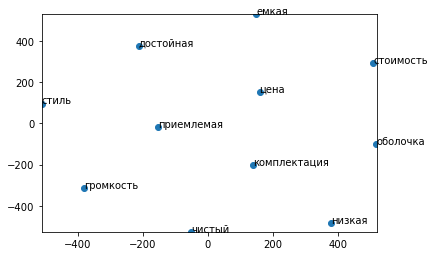

In [130]:
display_closestwords_tsnescatterplot(w2v_model, 'цена')


## Model show

In [114]:
w2v_model.wv['экран']

array([ 0.04090174,  0.21362072,  0.09300508,  0.02695212,  0.03955225,
       -0.04965473, -0.04501295,  0.10919201,  0.01985615,  0.03156369,
       -0.02935953,  0.01014574,  0.02477992,  0.03641908,  0.06068704,
       -0.11502971,  0.04544832,  0.1357288 , -0.11160193, -0.08178044,
        0.15623046,  0.01310575, -0.03961875,  0.15482411, -0.09312061,
       -0.19296232, -0.08957074, -0.04672763,  0.03689215,  0.07492532,
       -0.0303292 , -0.11069307,  0.06607009,  0.00184417,  0.0538838 ,
       -0.01251828,  0.10826476,  0.01763976, -0.04213019, -0.01767863,
       -0.07405875,  0.02990746, -0.03996528,  0.09159224, -0.17439441,
       -0.11001251, -0.00986651,  0.17704687, -0.00130719, -0.12390958,
        0.07207023,  0.0680797 ,  0.11923839, -0.00535193, -0.02723923,
        0.10107733,  0.04986282,  0.04375026, -0.02217194, -0.12396241,
        0.02721026, -0.06346387, -0.00419792, -0.05422268,  0.092986  ,
       -0.18096109,  0.03541554, -0.09448621, -0.05410502, -0.12

In [111]:


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
#     print(labels)
#     print(tokens)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
#         print(value)
        x.append(value[0])
        y.append(value[1])
#     return
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()



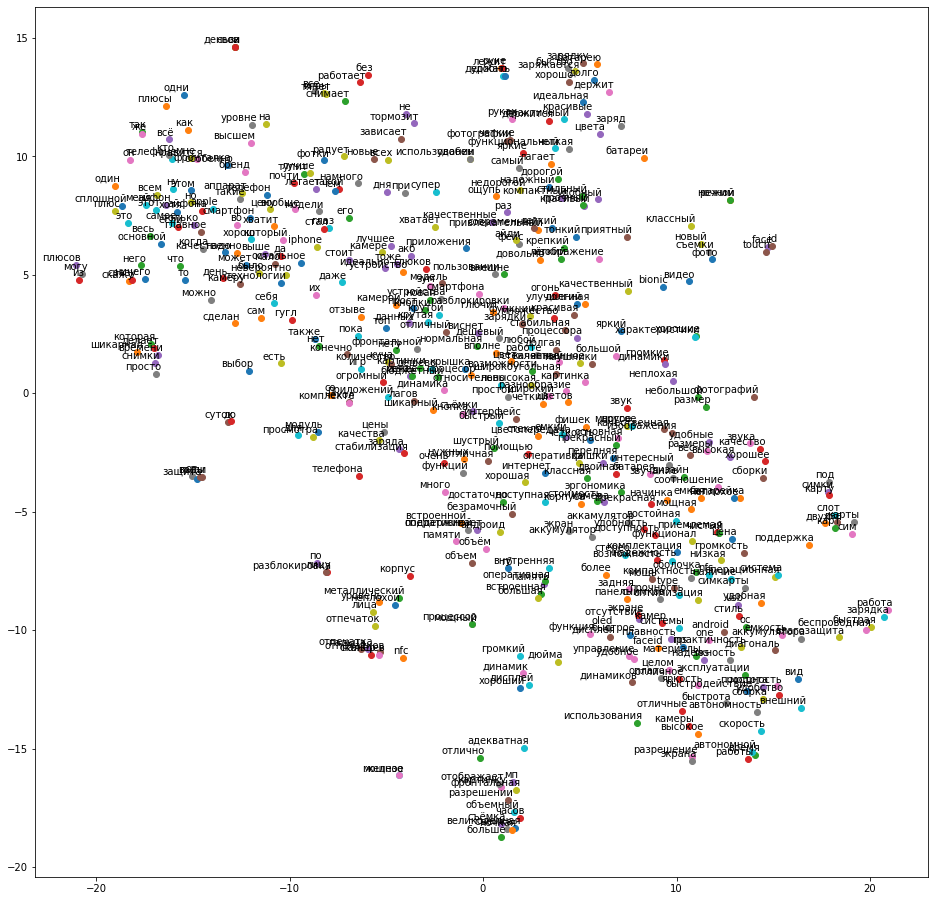

In [112]:
tsne_plot(w2v_model)

In [95]:
vocab = list(w2v_model.wv.vocab)
X = w2v_model.wv[vocab]
X

array([[ 0.22504275,  0.5343872 ,  0.1879019 , ..., -0.42692658,
         0.15177816,  0.4762473 ],
       [ 0.22606681,  0.88263804,  0.34524277, ..., -0.3955673 ,
         0.05426089,  0.3268496 ],
       [ 0.4597275 ,  0.27611044,  0.10830108, ...,  0.73585296,
         0.29121974,  0.82367194],
       ...,
       [ 0.23408665,  0.13277072,  0.5061981 , ...,  0.18266308,
         0.15583263,  0.22039929],
       [ 0.3218127 ,  0.11365126,  0.41924128, ...,  0.12472664,
         0.07996638,  0.06751505],
       [ 0.27280816,  0.3863393 ,  0.31245536, ..., -0.25902918,
         0.06797185,  0.25306848]], dtype=float32)

In [83]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [84]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df

,x,y
цена,11.171092,5.835232
цвет,-1.408095,5.588271
отлично,10.972472,-16.296101
работает,-8.130553,-10.116926
камера,8.172004,4.764382
...,...,...
внешне,-2.875279,10.504695
гугл,-5.329629,-4.994945
стоит,-8.546317,-5.049764
мало,-16.880833,-6.093596


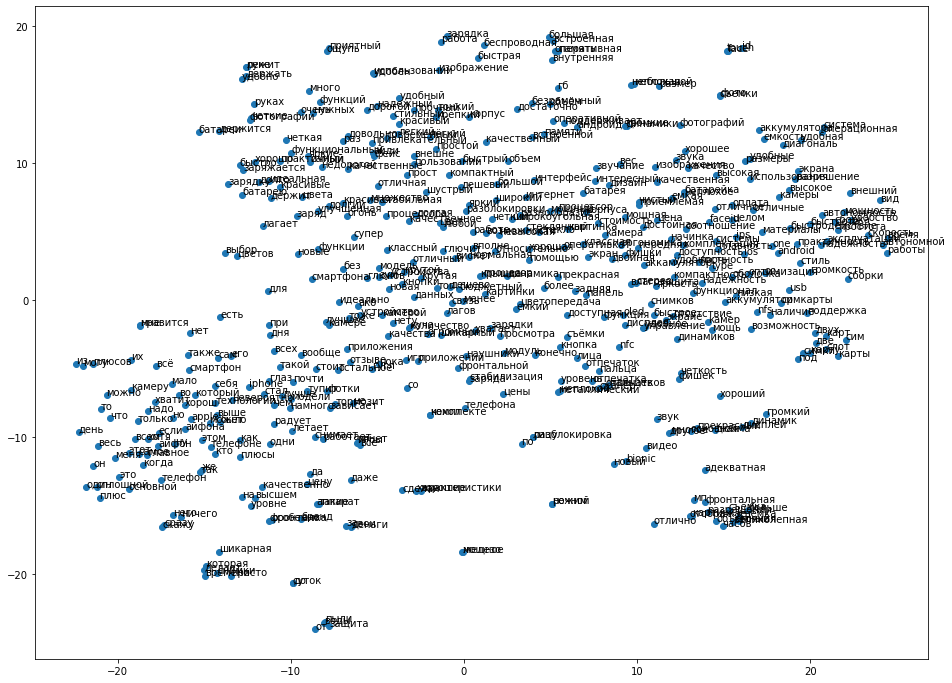

In [85]:
fig = plt.figure( figsize=(16, 12))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])


for word, pos in df.iterrows():
    ax.annotate(word, pos)

    
    